# ) FIFA WORLD CUP 2022 - Data Exploration

In [2]:
#Basic libraries
import urllib
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import datetime as dt
from matplotlib.ticker import MaxNLocator
import PIL
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder

from sklearn import set_config; set_config(display='diagram')

## Load Data

In [4]:
raw_df = pd.read_csv('../raw_data/results.csv')#International Football Results from 1872-2022 
raw_df.head(5)

FileNotFoundError: [Errno 2] No such file or directory: '../raw_data/results.csv'

In [15]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44060 entries, 0 to 44059
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        44060 non-null  object 
 1   home_team   44060 non-null  object 
 2   away_team   44060 non-null  object 
 3   home_score  44059 non-null  float64
 4   away_score  44059 non-null  float64
 5   tournament  44060 non-null  object 
 6   city        44060 non-null  object 
 7   country     44060 non-null  object 
 8   neutral     44060 non-null  bool   
dtypes: bool(1), float64(2), object(6)
memory usage: 2.7+ MB


In [68]:
shootout_raw_df = pd.read_csv('../raw_data/shootouts.csv')#Matched Won on penalty shootout from 1967 - 2022
shootout_raw_df.tail()

,date,home_team,away_team,winner
500,2022-03-29,Senegal,Egypt,Senegal
501,2022-06-13,Australia,Peru,Australia
502,2022-06-14,Chile,Ghana,Ghana
503,2022-09-22,Thailand,Malaysia,Malaysia
504,2022-09-25,Malaysia,Tajikistan,Tajikistan


In [16]:
shootout_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       505 non-null    object
 1   home_team  505 non-null    object
 2   away_team  505 non-null    object
 3   winner     505 non-null    object
dtypes: object(4)
memory usage: 15.9+ KB


## Clean Data

In [23]:
raw_df.describe()

,home_score,away_score
count,44059.000000,44059.000000
mean,1.740507,1.178306
std,1.747525,1.394815
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


In [25]:
raw_df.shape

(44060, 9)

In [30]:
#Columns with NaN null values
raw_df.columns[raw_df.isna().any()]
raw_df.isna().sum()
raw_df = raw_df.dropna(how='any')
raw_df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False


In [31]:
raw_df.isnull().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

In [32]:
result_df = raw_df
result_df

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
44054,2022-09-27,Albania,Iceland,1.0,1.0,UEFA Nations League,Tirana,Albania,False
44055,2022-09-27,Norway,Serbia,0.0,2.0,UEFA Nations League,Oslo,Norway,False
44056,2022-09-27,Sweden,Slovenia,1.0,1.0,UEFA Nations League,Stockholm,Sweden,False
44057,2022-09-27,Kosovo,Cyprus,5.0,1.0,UEFA Nations League,Pristina,Kosovo,False


In [33]:
#Adding goal difference and establishing who is the winner 
winner = []
for i in range (len(result_df['home_team'])):
    if result_df ['home_score'][i] > result_df['away_score'][i]:
        winner.append(result_df['home_team'][i])
    elif result_df['home_score'][i] < result_df ['away_score'][i]:
        winner.append(result_df['away_team'][i])
    else:
        winner.append('Draw')
result_df['winning_team'] = winner

#adding goal difference column
result_df['goal_difference'] = np.absolute(result_df['home_score'] - result_df['away_score'])

result_df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winning_team,goal_difference
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False,Draw,0.0
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False,England,2.0
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False,Scotland,1.0
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False,Draw,0.0
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False,Scotland,3.0


### Filtering data with qualified team only

In [63]:
qualified_team = pd.read_csv('../raw_data/fixtures.csv')
qualified_team = qualified_team["home_team"]
qualified_team = qualified_team.drop_duplicates()
worldcup_teams = qualified_team.values.tolist()
print(f'List of teams qualified for FIFA world cup 2022 :{worldcup_teams}')
print(f'----------------------------------------------------------------')
print(f'Number of teams playing in Fifa World cup 2022 :{len(worldcup_teams)}')

List of teams qualified for FIFA world cup 2022 :['Qatar', 'Senegal', 'Netherlands', 'Ecuador', 'England', 'USA', 'Wales', 'Iran', 'Argentina', 'Mexico', 'Poland', 'Saudi Arabia', 'Denmark', 'France', 'Tunisia', 'Australia', 'Germany', 'Spain', 'Japan', 'Costa Rica', 'Morocco', 'Belgium', 'Croatia', 'Canada', 'Switzerland', 'Brazil', 'Cameroon', 'Serbia', 'Uruguay', 'Portugal', 'South Korea', 'Ghana']
----------------------------------------------------------------
Number of teams playing in Fifa World cup 2022 :32


In [119]:
#narrowing to team patcipating in the world cup(results.csv)
df_teams_home = result_df[result_df['home_team'].isin(worldcup_teams)]
df_teams_away = result_df[result_df['away_team'].isin(worldcup_teams)]
df_teams = pd.concat((df_teams_home, df_teams_away))
df_teams.drop_duplicates()
df_teams.count()
results = df_teams
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winning_team,goal_difference
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False,England,2.0
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False,Draw,0.0
6,1877-03-03,England,Scotland,1.0,3.0,Friendly,London,England,False,Scotland,2.0
7,1877-03-05,Wales,Scotland,0.0,2.0,Friendly,Wrexham,Wales,False,Scotland,2.0
10,1879-01-18,England,Wales,2.0,1.0,Friendly,London,England,False,England,1.0


In [71]:
#narrowing to team patcipating in the world cup which has gone in a shootout or extra time
so_home = shootout_raw_df[shootout_raw_df['home_team'].isin(worldcup_teams)]
so_away  = shootout_raw_df[shootout_raw_df['away_team'].isin(worldcup_teams)]
shootout_raw_df = pd.concat((so_home, so_away))
shootout_raw_df.drop_duplicates()
shootout_raw_df.count()
shootout_raw_df.head()

,date,home_team,away_team,winner
1,1971-11-14,South Korea,Vietnam Republic,South Korea
4,1973-04-21,Senegal,Ghana,Ghana
14,1974-03-28,Qatar,United Arab Emirates,Qatar
19,1974-12-18,South Korea,Malaysia,South Korea
20,1975-07-13,Morocco,Ghana,Morocco


In [102]:
ranking_raw = pd.read_csv('../raw_data/teamsranking.csv')#Load Team rankings of teams
ranking_raw.head(28)
#some problems identifying names, need to change IR Iran  : Iran, Republic Korea : South Korea
ranking_raw['countryName'] = ranking_raw['countryName'].replace(['IR Iran', 'Korea Republic']
                                              , ['Iran', 'South Korea'])



In [117]:
#filter ranking data set with qualified teams for FIFA world cup 2022(teamsranking.csv)
team_name = ranking_raw[ranking_raw['countryName'].isin(worldcup_teams)]
team_name.head()
team_ranking = team_name
team_ranking.head()

,rank,countryCode,countryName,totalPoints,previousPoints
0,1,BRA,Brazil,1841.30,1837.56
1,2,BEL,Belgium,1816.71,1821.92
2,3,ARG,Argentina,1773.88,1770.65
3,4,FRA,France,1759.78,1764.85
4,5,ENG,England,1728.47,1737.46


In [123]:
#filter shootout.csv dataset with qualified teams
shootout_raw_df = pd.concat((so_home, so_away))
shootout_raw_df.drop_duplicates()
shootout_raw_df.count()
shootout_raw_df.head()
pens = shootout_raw_df
pens.head()

,date,home_team,away_team,winner
1,1971-11-14,South Korea,Vietnam Republic,South Korea
4,1973-04-21,Senegal,Ghana,Ghana
14,1974-03-28,Qatar,United Arab Emirates,Qatar
19,1974-12-18,South Korea,Malaysia,South Korea
20,1975-07-13,Morocco,Ghana,Morocco


In [126]:
#breaking down the date column of results dataset

results["date"]=pd.to_datetime(results["date"])
results["year"]=pd.DatetimeIndex(results["date"]).year
results["month"]=pd.DatetimeIndex(results["date"]).month_name()
results=results[["date","year","month","home_team","away_team","home_score","winning_team","away_score","tournament",
                 "city","country","neutral"]]



In [127]:
results.head()

,date,year,month,home_team,away_team,home_score,winning_team,away_score,tournament,city,country,neutral
1,1873-03-08,1873,March,England,Scotland,4.0,England,2.0,Friendly,London,England,False
3,1875-03-06,1875,March,England,Scotland,2.0,Draw,2.0,Friendly,London,England,False
6,1877-03-03,1877,March,England,Scotland,1.0,Scotland,3.0,Friendly,London,England,False
7,1877-03-05,1877,March,Wales,Scotland,0.0,Scotland,2.0,Friendly,Wrexham,Wales,False
10,1879-01-18,1879,January,England,Wales,2.0,England,1.0,Friendly,London,England,False


In [129]:
#breaking down the date column of shootout dataset
pens["date"]=pd.to_datetime(pens["date"])
pens["year"]=pd.DatetimeIndex(pens["date"]).year
pens["month"]=pd.DatetimeIndex(pens["date"]).month_name()
pens=pens[["date","year","month","home_team","away_team","winner"]]


In [130]:
pens.head()

,date,year,month,home_team,away_team,winner
1,1971-11-14,1971,November,South Korea,Vietnam Republic,South Korea
4,1973-04-21,1973,April,Senegal,Ghana,Ghana
14,1974-03-28,1974,March,Qatar,United Arab Emirates,Qatar
19,1974-12-18,1974,December,South Korea,Malaysia,South Korea
20,1975-07-13,1975,July,Morocco,Ghana,Morocco


## DATA ANALYSIS

* Top 10 years with most played games

In [131]:
top_10_years=pd.DataFrame(results["year"].value_counts().head(10))
top_10_years.columns=["Number of games"]
top_10_years

,Number of games
2021,487
2004,448
2000,441
2001,436
1997,428
2008,427
2013,427
2011,408
2006,407
2018,403


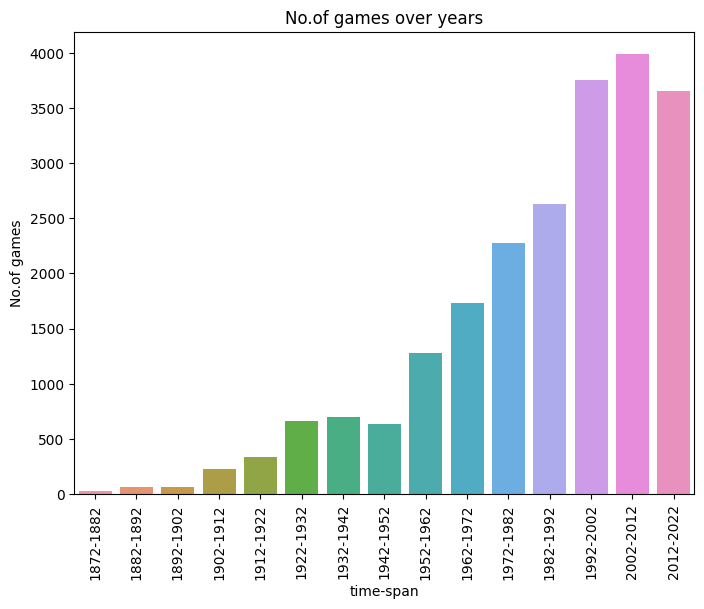

In [132]:
freq_table=results.copy()
freq_table["freq"]=pd.cut(results["year"],15)
decades=pd.DataFrame(freq_table.groupby("freq")["year"].count().reset_index())
order=["1872-1882","1882-1892","1892-1902","1902-1912","1912-1922","1922-1932","1932-1942","1942-1952",
       "1952-1962","1962-1972","1972-1982","1982-1992","1992-2002","2002-2012","2012-2022"]
fig,ax=plt.subplots(figsize=(8,6))
sns.barplot(data=decades,x="freq",y="year")
plt.xlabel("time-span")
plt.ylabel("No.of games")
plt.title("No.of games over years")
ax.set_xticklabels(order)
plt.xticks(rotation="vertical");

Text(0.5, 1.0, 'Average number of games played per month')

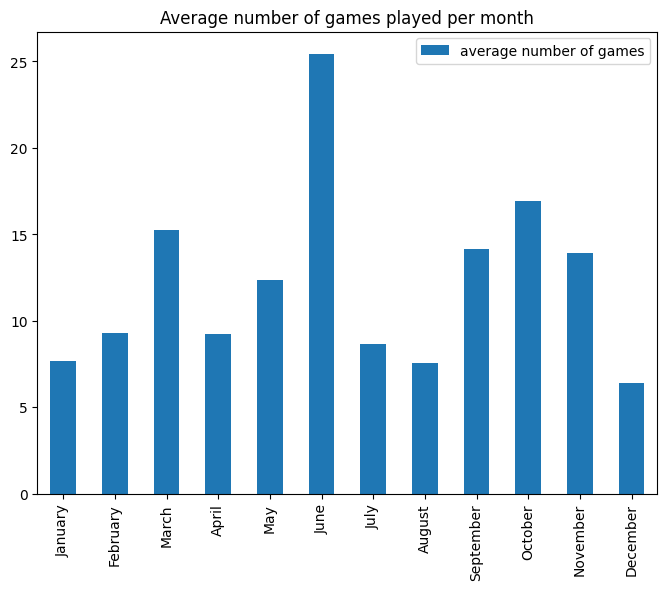

In [135]:
avg_month_games=pd.DataFrame(results["month"].value_counts()/150)
avg_month_games.columns=["average number of games"]
order=["January","February","March","April","May","June","July","August","September","October","November","December"]
arr=avg_month_games.reindex(index=order)
arr.plot(kind="bar",figsize=(8,6))
plt.title("Average number of games played per month")

In [138]:
# Most winning teams
win_df=results[results["winning_team"]!="Draw"]
top_10_wins=pd.DataFrame(win_df["winning_team"].value_counts().head(10))
top_10_wins.columns=["games won"]
top_10_wins

,games won
Brazil,923
England,826
Argentina,785
Germany,781
France,614
Mexico,599
Netherlands,593
Spain,572
South Korea,563
Uruguay,546


In [140]:
#least winning team 
least_10_wins=pd.DataFrame(win_df["winning_team"].value_counts().tail(10))
least_10_wins.columns=["games won"]
least_10_wins


,games won
Kenya,1
Namibia,1
Corsica,1
Palestine,1
Cambodia,1
Bermuda,1
Suriname,1
Turkmenistan,1
Comoros,1
Tajikistan,1


In [167]:
#numbers of matched played by all qualified teams in all tournaments
comp=pd.DataFrame(results["tournament"].value_counts().reset_index())
comp.columns=["tournament","games"]
comp

,tournament,games
0,Friendly,9680
1,FIFA World Cup qualification,3905
2,UEFA Euro qualification,1367
3,FIFA World Cup,1077
4,Copa América,801
...,...,...
86,OSN Cup,2
87,FIFA 75th Anniversary Cup,2
88,Copa Confraternidad,2
89,Arab Cup qualification,2


In [182]:
result_tour = results.tournament.value_counts().head(10)
result_tour

Friendly                                9680
FIFA World Cup qualification            3905
UEFA Euro qualification                 1367
FIFA World Cup                          1077
Copa América                             801
British Championship                     505
African Cup of Nations qualification     461
African Cup of Nations                   410
UEFA Euro                                381
AFC Asian Cup                            291
Name: tournament, dtype: int64

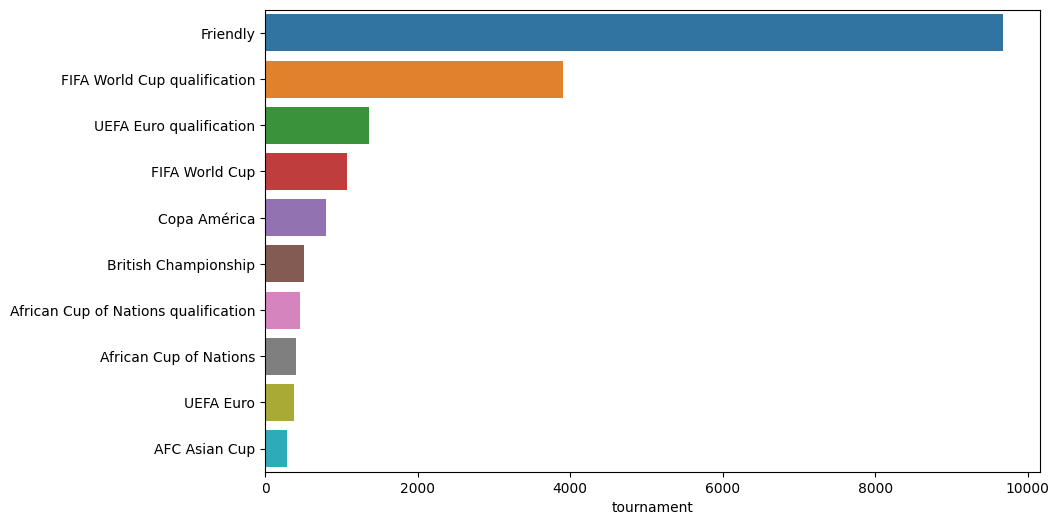

In [183]:
sns.barplot(y=result_tour.index, x=result_tour);


In [142]:
#Percentage of games decided with penalities in all competitive games by qualified teams
no_friendly_games=results.loc[results["tournament"]!="Friendly"]
number_of_games=len(no_friendly_games)
number_of_games_with_pens=len(pens)
print("Percentage of games decided after penalties shootouts=" ,(number_of_games_with_pens/number_of_games)*100)


Percentage of games decided after penalties shootouts= 5.952380952380952


In [143]:
most_pens_win=pd.DataFrame(pens["winner"].value_counts().head(10))
most_pens_win

,winner
Argentina,61
South Korea,55
Brazil,52
Uruguay,42
Germany,41
Mexico,34
Saudi Arabia,33
Japan,33
Tunisia,27
Spain,27


In [144]:
most_pens_win.reset_index(inplace=True)

In [145]:
top_won_country_df = most_pens_win.rename(columns={ "index":"Countries", 'winner':'Matches-Won'})
top_won_country_df

,Countries,Matches-Won
0,Argentina,61
1,South Korea,55
2,Brazil,52
3,Uruguay,42
4,Germany,41
5,Mexico,34
6,Saudi Arabia,33
7,Japan,33
8,Tunisia,27
9,Spain,27


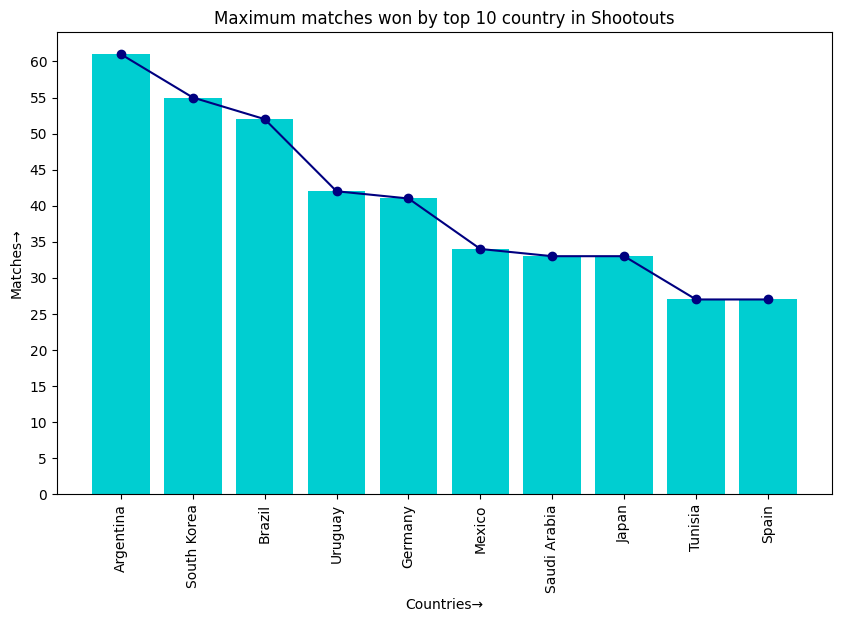

In [150]:
plt.rcParams['figure.figsize'] = (10, 6)
plt.title("Maximum matches won by top 10 country in Shootouts")
plt.yticks(ticks = np.arange(0,150,5))
plt.xticks(rotation = 90)
plt.xlabel('Countries→')
plt.ylabel('Matches→')
plt.plot(top_won_country_df.Countries, top_won_country_df["Matches-Won"], marker='o', color='NAVY')
plt.bar(top_won_country_df.Countries, top_won_country_df["Matches-Won"], color="DARKTURQUOISE");

In [184]:
#top 10 home teams wins
FIFA_matches = results[results.tournament=='FIFA World Cup']
FIFA_matches_hs = FIFA_matches[FIFA_matches.apply(lambda x: x['home_score'] > x['away_score'], axis = 1)]
max_won_FIFA_matches = FIFA_matches_hs.home_team.value_counts().head(10)
max_won_FIFA_matches = pd.DataFrame(max_won_FIFA_matches)
max_won_FIFA_matches.reset_index(inplace=True)
max_won_FIFA_matches = max_won_FIFA_matches.rename(columns={'index':'Teams', 'home_team':'Total_Matches_Won'})
max_won_FIFA_matches


,Teams,Total_Matches_Won
0,Brazil,80
1,Germany,74
2,Argentina,60
3,France,37
4,England,28
5,Netherlands,24
6,Belgium,21
7,Spain,16
8,Portugal,16
9,Mexico,14


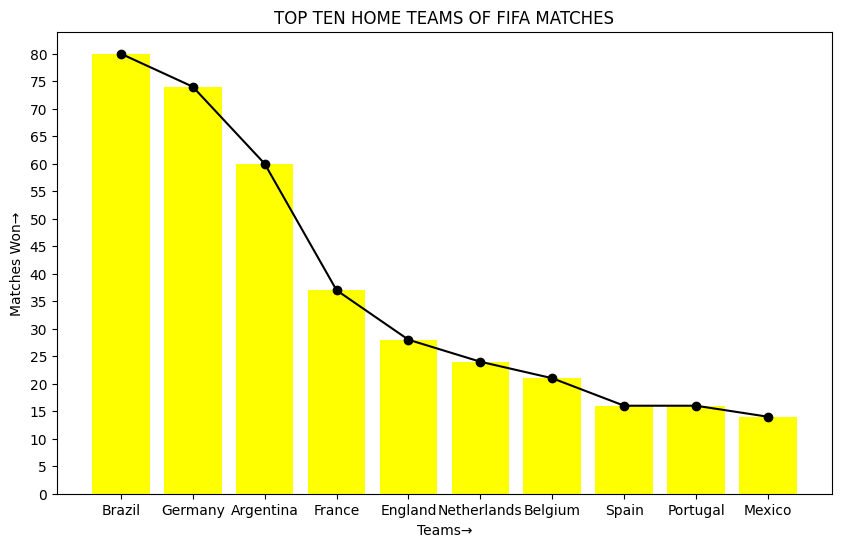

In [186]:
plt.rcParams['figure.figsize'] = (10, 6)
plt.title("TOP TEN HOME TEAMS OF FIFA MATCHES")
plt.yticks(ticks = np.arange(0,100,5))
plt.xticks(rotation = 0)
plt.xlabel('Teams→')
plt.ylabel('Matches Won→')
plt.plot(max_won_FIFA_matches.Teams, max_won_FIFA_matches["Total_Matches_Won"], marker='o', color='black')
plt.bar(max_won_FIFA_matches.Teams, max_won_FIFA_matches["Total_Matches_Won"], color="Yellow");

In [187]:
#Top 10 away win teams
FIFA_matches_at = results[results.tournament=='FIFA World Cup']
FIFA_matches_hs_at = FIFA_matches_at[FIFA_matches_at.apply(lambda x: x['home_score'] < x['away_score'], axis = 1)]
max_won_FIFA_matches_at = FIFA_matches_hs_at.home_team.value_counts().head(10)
max_won_FIFA_matches_at = pd.DataFrame(max_won_FIFA_matches_at)
max_won_FIFA_matches_at.reset_index(inplace=True)
max_won_FIFA_matches_at = max_won_FIFA_matches_at.rename(columns={'index':'Teams', 'home_team':'Total_Matches_Won'})
max_won_FIFA_matches_at

,Teams,Total_Matches_Won
0,Brazil,23
1,Argentina,22
2,Germany,18
3,South Korea,16
4,Spain,15
5,France,14
6,Mexico,14
7,England,14
8,Uruguay,13
9,Cameroon,11


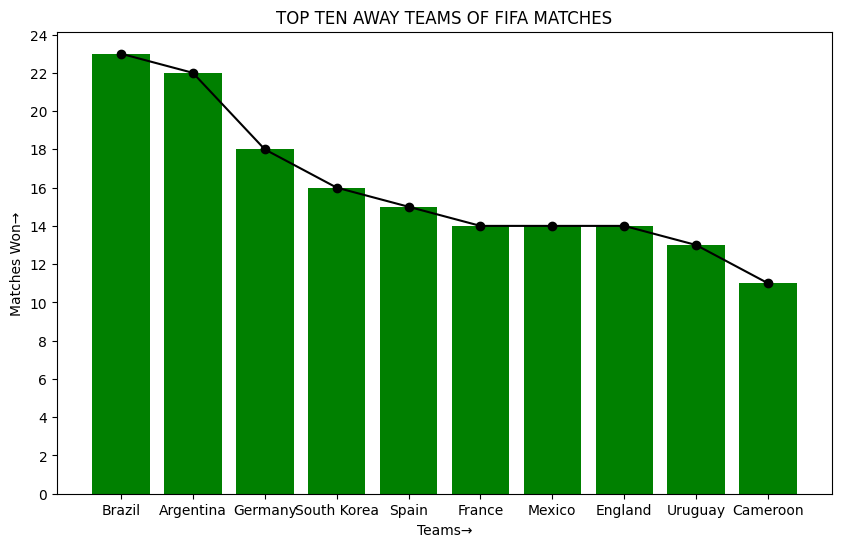

In [192]:
plt.rcParams['figure.figsize'] = (10, 6)
plt.title("TOP TEN AWAY TEAMS OF FIFA MATCHES")
plt.yticks(ticks = np.arange(0,25,2))
plt.xticks(rotation = 0)
plt.xlabel('Teams→')
plt.ylabel('Matches Won→')
plt.plot(max_won_FIFA_matches_at.Teams, max_won_FIFA_matches_at["Total_Matches_Won"], marker='o', color='black')
plt.bar(max_won_FIFA_matches_at.Teams, max_won_FIFA_matches_at["Total_Matches_Won"], color="Green");


In [193]:
#mergedRes = pd.merge(dataFrame1, dataFrame2, on ='Car')
mergedFIFA= pd.merge (max_won_FIFA_matches, max_won_FIFA_matches_at, on = 'Teams')
mergedFIFA


,Teams,Total_Matches_Won_x,Total_Matches_Won_y
0,Brazil,80,23
1,Germany,74,18
2,Argentina,60,22
3,France,37,14
4,England,28,14
5,Spain,16,15
6,Mexico,14,14


In [194]:
mergedFIFA["Top_Team"] = mergedFIFA['Total_Matches_Won_x'] + mergedFIFA['Total_Matches_Won_y']
FIFA=mergedFIFA.rename(columns={'Total_Matches_Won_x':'Home_winning_score', 'Total_Matches_Won_y':'Away_Winning_Score'})
FIFA_tf=FIFA[:5]
FIFA_tf


,Teams,Home_winning_score,Away_Winning_Score,Top_Team
0,Brazil,80,23,103
1,Germany,74,18,92
2,Argentina,60,22,82
3,France,37,14,51
4,England,28,14,42


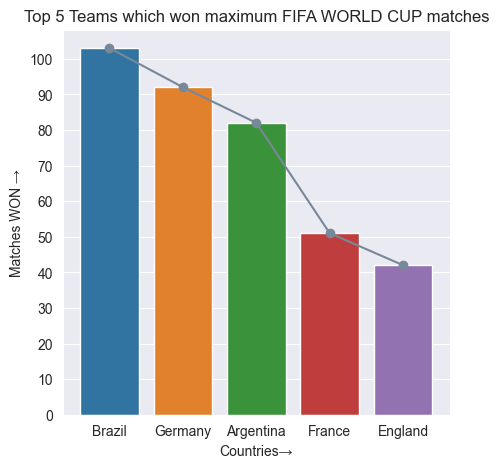

In [197]:
plt.rcParams['figure.figsize'] = (5, 5)
sns.set_style('darkgrid')

plt.title('Top 5 Teams which won maximum FIFA WORLD CUP matches')
plt.yticks(range(0,125,10))

sns.barplot(x= FIFA_tf.Teams,y= FIFA_tf.Top_Team);
plt.plot( FIFA_tf.Teams, FIFA_tf.Top_Team, c='LIGHTSLATEGRAY', marker='o' )

plt.ylabel('Matches WON →')
plt.xlabel('Countries→');
